In [23]:
# Initial imports.
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:
#Read data
data = pd.read_csv(Path('./second_dataset.csv'))
df = pd.DataFrame(data)

In [25]:
#Drop insignificant columns
df = df.drop(columns=['artist_name','track_id', 'track_name','key', 'mode', 'time_signature'])

In [26]:
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration
0,0.112,0.653,0.524,0.000000,0.2030,-9.016,0.0502,83.970,0.553,97,160.0
1,0.468,0.737,0.802,0.000000,0.0931,-4.771,0.0878,144.015,0.682,92,172.0
2,0.779,0.699,0.304,0.000993,0.1370,-11.192,0.0993,119.705,0.271,83,160.0
3,0.207,0.774,0.554,0.000000,0.1320,-7.909,0.0383,99.034,0.349,82,163.0
4,0.737,0.483,0.412,0.000000,0.1160,-8.461,0.0402,170.163,0.247,81,204.0


<AxesSubplot: >

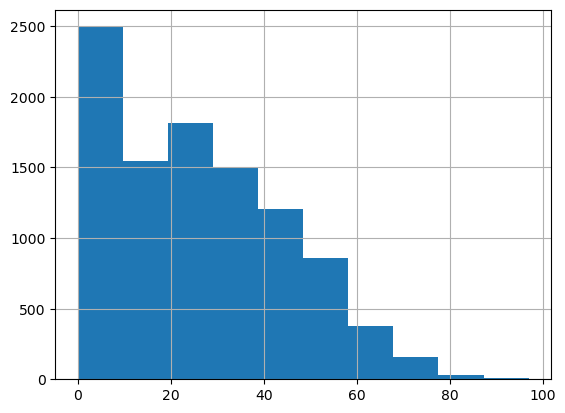

In [27]:
df['popularity'].hist()

In [28]:
df['is_popular']=df['popularity']>=60
df['is_popular']

0        True
1        True
2        True
3        True
4        True
        ...  
9994    False
9995    False
9996    False
9997    False
9998    False
Name: is_popular, Length: 9999, dtype: bool

In [29]:
# Define the features set.
X = df.copy()
X = X.drop(columns=["popularity", 'is_popular'])
X.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
0,0.112,0.653,0.524,0.000000,0.2030,-9.016,0.0502,83.970,0.553,160.0
1,0.468,0.737,0.802,0.000000,0.0931,-4.771,0.0878,144.015,0.682,172.0
2,0.779,0.699,0.304,0.000993,0.1370,-11.192,0.0993,119.705,0.271,160.0
3,0.207,0.774,0.554,0.000000,0.1320,-7.909,0.0383,99.034,0.349,163.0
4,0.737,0.483,0.412,0.000000,0.1160,-8.461,0.0402,170.163,0.247,204.0


In [30]:
# Define the target set.
# y = df["popularity"]
y = df["is_popular"]
y[:5]

0    True
1    True
2    True
3    True
4    True
Name: is_popular, dtype: bool

In [31]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [32]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Create a random forest classifier.
# rf_model = RandomForestRegressor(random_state=1) 
rf_model = RandomForestClassifier(random_state=1) 

In [34]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [35]:
predictions = rf_model.predict(X_test_scaled)

In [36]:
predictions

array([False, False, False, ..., False, False, False])

In [37]:
print(rf_model.score(X_train_scaled, y_train))
print(rf_model.score(X_test_scaled, y_test))

1.0
0.9492


In [38]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,2373,1
Actual 1,126,0


In [40]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
acc_score

0.9492

In [41]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2373,1
Actual 1,126,0


Accuracy Score : 0.9492
Classification Report
              precision    recall  f1-score   support

       False       0.95      1.00      0.97      2374
        True       0.00      0.00      0.00       126

    accuracy                           0.95      2500
   macro avg       0.47      0.50      0.49      2500
weighted avg       0.90      0.95      0.92      2500



In [42]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.10269924, 0.11285063, 0.09958225, 0.06862601, 0.09146524,
       0.11756511, 0.09653112, 0.11080251, 0.10820415, 0.09167375])

In [43]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.11756510513950413, 'loudness'),
 (0.11285062542274242, 'danceability'),
 (0.11080250940778201, 'tempo'),
 (0.10820414815224541, 'valence'),
 (0.10269924040258255, 'acousticness'),
 (0.09958225286149038, 'energy'),
 (0.09653111716583666, 'speechiness'),
 (0.09167375081338369, 'duration'),
 (0.09146524157542696, 'liveness'),
 (0.06862600905900565, 'instrumentalness')]